Question 4 (Some code were modified based on the solution of problem set 1.4)

In [175]:
import numpy as np
import matplotlib.pyplot as plt


In [106]:
#Lennard-Jones potential and force calculation
def ljpot(r1,r2,e=1.77,sig=4.10): #r1 and r2 are coordinate for two particle.

    #Calculate the distance
    r = np.linalg.norm(r1-r2)

    #LJ potential calculation
    potential = 4*e*((sig/r)**12-(sig/r)**6)

    return potential


In [107]:
#Question 4b.
def ljforce(r1,r2,e=1.77,sig=4.10):
    
    #Calculate the distance
    r = np.linalg.norm(r1-r2)
    #Analytical derivative of LJ potential
    ljDer= -24*e*sig**6*r**-13*(r**6-2*sig**6) 

    #Force calculation between two particles based on the equation from 4a
    force1 = -ljDer * (r1-r2)/r
    force2 = -force1
    

    return force1, force2

In [108]:
#Question 4c. 

rmin = 4.60400445

#Generating a cube in n dimentional 
def make_cube(n):
    coord = []
    for i in range (n):
        for j in range (n):
            for k in range (n):
                coord.append([i,j,k])
    cube = np.array(coord) * rmin
    return cube

In [194]:
#Forces calculation on each atom in the cube
def forceCalc(coord):
    E = 0 
    forceMatrix = np.zeros((len(coord),3)) #ForceMatrix that can contain the forces later 

    #Force calculation
    for i in range (coord.shape[0]):
        for j in range (coord.shape[0]):
            if i < j:
                forceI, forceJ = ljforce(coord[i], coord[j])
                forceMatrix[i] = forceMatrix[i] + forceI
                forceMatrix[j] = forceMatrix[j] + forceJ
                E += ljpot(coord[i],coord[j])
    
    #Normalization of the force vector
    forceNorm = forceMatrix / np.linalg.norm(forceMatrix)
               
    return forceMatrix, E, forceNorm

forceMatrix, E, forceNorm = forceCalc(make_cube(2))
print (forceMatrix)


[[-0.56966985 -0.56966985 -0.56966985]
 [-0.56966985 -0.56966985  0.56966985]
 [-0.56966985  0.56966985 -0.56966985]
 [-0.56966985  0.56966985  0.56966985]
 [ 0.56966985 -0.56966985 -0.56966985]
 [ 0.56966985 -0.56966985  0.56966985]
 [ 0.56966985  0.56966985 -0.56966985]
 [ 0.56966985  0.56966985  0.56966985]]


In [193]:
#Question 4d.

#Atomic positions for 3*3*3 cube
coord = make_cube(3)

forceMatrix, E, forceNorm = forceCalc(make_cube(3))
print ('The energy before optimization is ', E, "KJ/mol") #Initial energy

# create initial .xyz file
f = open('initial_coordinate' + '.xyz','w')
print(len(coord),file=f)
print('\n',file=f)
for n in range(0,len(coord)):
    print("Xe", "\t", coord[n][0],"\t" ,coord[n][1] ,"\t",coord[n][2],file=f)
f.close()

#3000 step displacement
step = []
energyArr = []
stepsize = 0.01

for i in np.arange(0,3000,1):
    step.append(i)
    forceMatrix, E, forceNorm = forceCalc(coord)
    coord = coord - stepsize * forceNorm
    energyArr.append(E)

# write final xyz file respect to 0.01 step result
ff = open('optimized_coordinate' + '.xyz','w')  # rename this file for the case at hand
print(len(coord),file=ff)
print('\n',file=ff)
for n in range(0,len(coord)):
    print("Xe", "\t", coord[n][0],"\t" ,coord[n][1] ,"\t",coord[n][2],file=ff)
ff.close()

print ('The energy after optimization is ', energyArr[-1], 'KJ/mol') #Energy after optimization

The energy before optimization is  -134.02187429573846 KJ/mol
The energy after optimization is  -193.34628754207526 KJ/mol


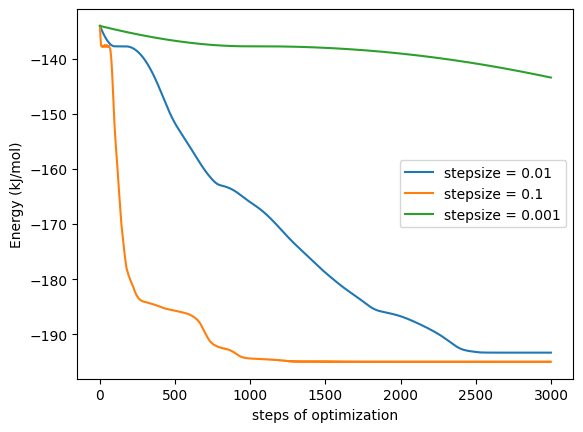

With larger stepsize, it took less time to finish the optimization.


In [185]:
#Question 4f

coord_1 = coord_2= coord_3 = make_cube(3)

step = []
energyArr_1 = []
energyArr_2 = []
energyArr_3 = []

for i in np.arange(0,3000,1):
    step.append(i)
    forceMatrix_1, E_1, forceNorm_1 = forceCalc(coord_1)
    forceMatrix_2, E_2, forceNorm_2 = forceCalc(coord_2)
    forceMatrix_3, E_3, forceNorm_3 = forceCalc(coord_3)
    coord_1 = coord_1 - 0.01 * forceNorm_1
    coord_2 = coord_2 - 0.1 * forceNorm_2
    coord_3 = coord_3 - 0.001 * forceNorm_3
    energyArr_1.append(E_1)
    energyArr_2.append(E_2)
    energyArr_3.append(E_3)

#plot
fig, ax = plt.subplots()
ax.plot (step, energyArr_1,label = 'stepsize = 0.01')
ax.plot (step, energyArr_2,label = 'stepsize = 0.1')
ax.plot (step, energyArr_3,label = 'stepsize = 0.001')
ax.set_xlabel ("steps of optimization")
ax.set_ylabel ("Energy (kJ/mol)")
ax.legend()
plt.show()

print ("With larger stepsize, it took less time to finish the optimization.")